In [ ]:
'''
    Afshin Karimi
    99210431
    Machine Learning 2nd phase
'''

## Initialaize

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics
import pickle
import random
from prettytable import PrettyTable
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def clustering_analysis(labels, predictions , model):
    homogeneity_score = metrics.homogeneity_score(labels, predictions)
    v_measure_score = metrics.v_measure_score(labels, predictions)
    sil_score = metrics.silhouette_score(model, predictions)
    fowlkes_mallows_score = metrics.fowlkes_mallows_score(labels, predictions)
    results = [
                homogeneity_score,
                v_measure_score,
                sil_score,
                fowlkes_mallows_score                
                  ] 
    
    print(f"homogeneity_score: \n{homogeneity_score}")
    print(f"v_measure_score: \n{v_measure_score}")
    print(f"silhouette_score: \n{sil_score}")
    print(f"fowlkes_mallows_score: \n{fowlkes_mallows_score}")
    return results

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [54]:
# load dataset
df = pd.read_csv('/content/gdrive/My Drive/Datasets/dataset.csv')
df.head()

,comment,sentiment
0,"Oh my god, it just doesn't get any worse than ...",negative
1,If you're a layman interested in quantum theor...,negative
2,It's amazing that this no talent actor Chapa g...,negative
3,This must be one of the most overrated Spanish...,negative
4,Some critics have compared Chop Shop with the ...,positive


In [55]:
# convert sentiment results to number {0,1}
df_copy = df.copy()
df_copy['sentiment'].replace('negative',0,inplace=True)
df_copy['sentiment'].replace('positive',1,inplace=True)
df_copy.head()

,comment,sentiment
0,"Oh my god, it just doesn't get any worse than ...",0
1,If you're a layman interested in quantum theor...,0
2,It's amazing that this no talent actor Chapa g...,0
3,This must be one of the most overrated Spanish...,0
4,Some critics have compared Chop Shop with the ...,1


In [56]:
# load BoW model
bow_model = np.load('/content/gdrive/My Drive/Datasets/bow/bow.npy')

In [ ]:
# load w2v model
w2v_model = np.load('w2v.npy')

## Cluster Analysis

### PCA

In [ ]:
Sc = StandardScaler()
X = Sc.fit_transform(bow_model)
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 

In [ ]:
# in case of RAM limitation for some models(reduced dataset)
random_indices = random.sample(range(45000), 9000)
X_reduced = [X[i] for i in random_indices]
df_reduced = [np.array(df_copy.sentiment)[i] for i in random_indices]
bow_reduced = [bow_model[i] for i in random_indices]
X_reduced = np.array(X_reduced)
df_reduced = np.array(df_reduced)
bow_reduced = np.array(bow_reduced)

### K-means

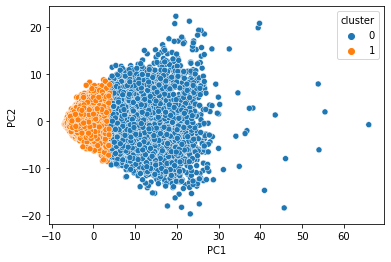

In [ ]:
# kmeans with 2 cluster
kmeans_model1 =KMeans(n_clusters=2).fit(X)
pca_data['cluster'] = pd.Categorical(kmeans_model1.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

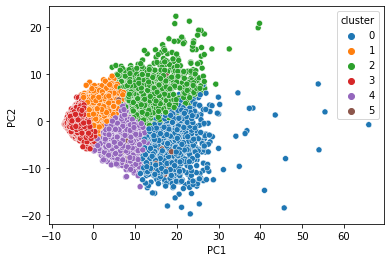

In [ ]:
# kmeans with 6 cluster
kmeans_model2 =KMeans(n_clusters=6).fit(X)
pca_data['cluster'] = pd.Categorical(kmeans_model2.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

### GMM

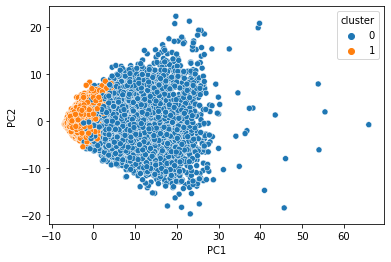

In [ ]:
# GMM with 2 cluster
gmm_model1 =GaussianMixture(n_components=2).fit(X)
pca_data['cluster'] = pd.Categorical(gmm_model1.predict(X))
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

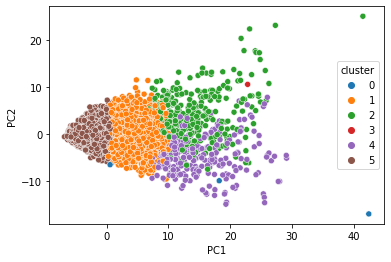

In [ ]:
# GMM with 6 cluster
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X_reduced),columns=['PC1','PC2']) 
gmm_model2 =GaussianMixture(n_components=6).fit(X_reduced)
pca_data['cluster'] = pd.Categorical(gmm_model2.predict(X_reduced))
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

### AgglomerativeClustering

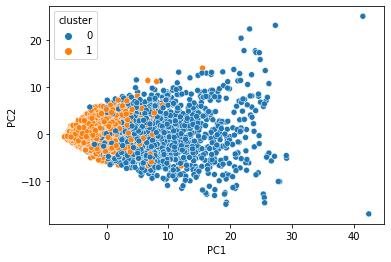

In [ ]:
# AgglomerativeClustering with 2 cluster
from sklearn.cluster import AgglomerativeClustering
agglomerative_model1 =AgglomerativeClustering(n_clusters=2).fit(X_reduced)
pca_data['cluster'] = pd.Categorical(agglomerative_model1.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

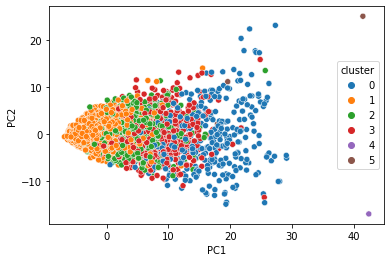

In [ ]:
# AgglomerativeClustering with 6 cluster
from sklearn.cluster import AgglomerativeClustering
agglomerative_model2 =AgglomerativeClustering(n_clusters=6).fit(X_reduced)
pca_data['cluster'] = pd.Categorical(agglomerative_model2.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

### Comparison

#### compare models with 2 clusters

In [ ]:
# K-means scores for 2 clusters
kmeans_results = clustering_analysis(df_copy.sentiment, kmeans_model1.labels_, bow_model)

homogeneity_score: 
6.15459441457775e-05
v_measure_score: 
7.523186078603305e-05
silhouette_score: 
0.294098711529492
fowlkes_mallows_score: 
0.6042163746636466


In [ ]:
# GMM scores for 2 clusters
gmm_results = clustering_analysis(df_copy.sentiment, gmm_model1.predict(X), bow_model)

homogeneity_score: 
0.0006878541908559129
v_measure_score: 
0.0007176438974249185
silhouette_score: 
0.16069989738640664
fowlkes_mallows_score: 
0.527842934450137


In [ ]:
# agglomerative scores for 2 clusters
Aggl_results = clustering_analysis(df_reduced, agglomerative_model1.labels_, bow_reduced)

homogeneity_score: 
8.008673515399195e-05
v_measure_score: 
8.782675941735047e-05
silhouette_score: 
0.18065660378047116
fowlkes_mallows_score: 
0.5554208013261656


In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

In [ ]:
x.field_names = ["Model", "homogeneity_score", "v_measure_score", "silhouette_score", "fowlkes_mallows_score"]
kmeans_results.insert(0,"k-means")
gmm_results.insert(0,"GMM")
Aggl_results.insert(0,"Agglomerative")
x.add_row(kmeans_results)
x.add_row(gmm_results)
x.add_row(Aggl_results)

In [ ]:
print(x)

+---------------+-----------------------+-----------------------+---------------------+-----------------------+
|     Model     |   homogeneity_score   |    v_measure_score    |   silhouette_score  | fowlkes_mallows_score |
+---------------+-----------------------+-----------------------+---------------------+-----------------------+
|    k-means    |  6.15459441457775e-05 | 7.523186078603305e-05 |  0.294098711529492  |   0.6042163746636466  |
|      GMM      | 0.0006878541908559129 | 0.0007176438974249185 | 0.16069989738640664 |   0.527842934450137   |
| Agglomerative | 8.008673515399195e-05 | 8.782675941735047e-05 | 0.18065660378047116 |   0.5554208013261656  |
+---------------+-----------------------+-----------------------+---------------------+-----------------------+


#### analyze k-means with 6 clusters

In [ ]:
positive_indices = np.where(kmeans_model2.labels_ == 3)[0]

In [ ]:
selected_comments = df.iloc[positive_indices[:3]]
selected_comments

,comment,sentiment
1,If you're a layman interested in quantum theor...,negative
2,It's amazing that this no talent actor Chapa g...,negative
3,This must be one of the most overrated Spanish...,negative


In [ ]:
for i, comment in enumerate(selected_comments.comment):
    print(f'comment number {i+1} : {comment}')

comment number 1 : If you're a layman interested in quantum theory and string theory, read "The Elegant Universe" by Brian Greene of Columbia University, and "The Universe in a Nutshell" by Stephen Hawking of Cambridge.<br /><br />Recipe for #$*!:<br /><br />3 parts bombastic New Age pontificator, 2 parts pseudoscientist, 2 parts real scientist<br /><br />Mix together until ingredients are indistinguishable from each other and spread on celluloid thin enough that there is no discernible substance.<br /><br />Serving suggestion: barf bags.
comment number 2 : It's amazing that this no talent actor Chapa got all these well known stars to appear in this dismal, pathetic, cheesy and overlong film about a low life gangster who looks white but is half Mexican, much of the acting is bad and many of the well known stars in this trashy movie are given a script that seems made up by a 16 year old, i'm sure this movie is the career low point for actors such as Dunaway, Wagner, Keach, Tilly and Bus

intuitive analysis : we saw that all 3 comments are negative and they were clustered in the same cluster correctly.

## Parameter Tuning

In [5]:
def analysis(labels, predictions):
    print(f"Report: Classification\n{classification_report(labels, predictions, target_names=['positive','negative'])}")
    print(f"Matrix: Confusion\n{confusion_matrix(labels, predictions)}")
    print(f"Accuracy: \n{accuracy_score(labels, predictions)}")

### MLP on smaller dataset

In [61]:
# load dataset
df2 = pd.read_csv('dataset2.csv')
# convert sentiment results to number {0,1}
df2['sentiment'].replace('negative',0,inplace=True)
df2['sentiment'].replace('positive',1,inplace=True)
df2.head()

,comment,sentiment
0,"This is bad..: It has every cliched ""gang"",""ba...",0
1,It's his training day.: I saw this movie on tv...,0
2,The most mundane cliched junk I've seen in a l...,0
3,(;D): The headline summarizes the movie! Denze...,1
4,Too much unbelievability: Denzel is a great ac...,0


In [62]:
# Preprocess
df_copy = df2.copy()
# convert all comments to lowercase
df_copy["comment"] = df_copy["comment"].str.lower()
# remove numbers from comments
df_copy['comment'] = df_copy['comment'].str.replace('\d+', '')
# remove special characters
df_copy.replace(r'[^A-Za-z0-9 ]+', '', regex=True,inplace=True)
# word tokenize
df_copy['comment']=df_copy['comment'].apply(word_tokenize)
# stop words removal
stopword = stopwords.words('english')
df_copy['comment'] = df_copy['comment'].apply(lambda x: [item for item in x if item not in stopword])
# lemma
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
    return s
df_copy['comment'] = df_copy['comment'].apply(lemmatize_text)
# stemming
def stemmed_text(text):
    snowball_stemmer = SnowballStemmer('english')
    return [snowball_stemmer.stem(w) for w in text]
    return s
df_copy['comment'] = df_copy['comment'].apply(stemmed_text)

In [64]:
# bow
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=500)
df_comments = [' '.join([str(elem) for elem in sublist]) for sublist in df_copy['comment']]
df_bow = bow_vectorizer.fit_transform(df_comments)
df_bow.shape

(500, 500)

In [66]:
X = df_bow
y = df_copy['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [10]:
mlp_model = MLPClassifier(hidden_layer_sizes=250, activation='relu', max_iter=300).fit(X_train, y_train)

In [11]:
predictions = mlp_model.predict(X_test)
analysis(y_test,predictions)

Report: Classification
              precision    recall  f1-score   support

    positive       0.84      0.74      0.79        57
    negative       0.70      0.81      0.75        43

    accuracy                           0.77       100
   macro avg       0.77      0.78      0.77       100
weighted avg       0.78      0.77      0.77       100

Matrix: Confusion
[[42 15]
 [ 8 35]]
Accuracy: 
0.77


### First phase best model

In [73]:
vectorizer = pickle.load(open('bow_vectorizer.pkl','rb'))

In [80]:
X = df_copy.comment
y = df_copy['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [82]:
x_tr = vectorizer.transform(X_train.apply(lambda x: ' '.join(x)))
x_te = vectorizer.transform(X_test.apply(lambda x: ' '.join(x)))

In [89]:
# use first phase best model to train new dataset
mlp_model = pickle.load(open('best.pkl','rb'))

In [90]:
mlp_model.fit(x_tr, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=250, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)

In [91]:
predictions = mlp_model.predict(x_te)
analysis(y_test,predictions)

Report: Classification
              precision    recall  f1-score   support

    positive       0.80      0.76      0.78        49
    negative       0.78      0.82      0.80        51

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100

Matrix: Confusion
[[37 12]
 [ 9 42]]
Accuracy: 
0.79
